Data Collection: List treasure multiplier, number of inhabitants, and popularity for each container.

Total Treasure Calculation: Multiply the base treasure by the container’s multiplier.

Divisor Calculation: Sum the number of inhabitants and the percentage (as a whole number).

Expected Share Determination: Divide the total treasure by this divisor.

Cost Adjustment: Subtract any SeaShell fee for a second container.

Decision Making: Rank containers based on net profit and choose up to two containers with the highest adjusted yield.

In [69]:
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


data = {
    'Container': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'],
    'Treasure_Multiplier': [10, 80, 37, 31, 17, 90, 50, 20, 73, 89],
    'Inhabitants': [1, 6, 3, 2, 1, 10, 4, 2, 4, 8]
}

df = pd.DataFrame(data)

print(df)

  Container  Treasure_Multiplier  Inhabitants
0        C1                   10            1
1        C2                   80            6
2        C3                   37            3
3        C4                   31            2
4        C5                   17            1
5        C6                   90           10
6        C7                   50            4
7        C8                   20            2
8        C9                   73            4
9       C10                   89            8


In [70]:

# Define constants
base_treasure = 10000
seashell_fee = 50000

# Total Treasure Calculation: 
# Multiply the base treasure by the container’s multiplier.
df['Total_Treasure'] = base_treasure * df['Treasure_Multiplier']

# Divisor Calculation:
# Sum the number of inhabitants and the popularity percentage.
df['Divisor'] = df['Inhabitants'] #+ df['Popularity']

# Expected Share Determination:
# Divide Total Treasure by the Divisor.
df['ExpectedShare'] = (df['Total_Treasure'] / df['Divisor']).round(2)

# Cost Adjustment:
# For a second container, subtract the SeaShell fee from the Expected Share.
df['NetProfit_Second'] = df['ExpectedShare'] - seashell_fee
df['ExpectedShare']
print("\nCalculated Data:")
print(df)


Calculated Data:
  Container  Treasure_Multiplier  Inhabitants  Total_Treasure  Divisor  \
0        C1                   10            1          100000        1   
1        C2                   80            6          800000        6   
2        C3                   37            3          370000        3   
3        C4                   31            2          310000        2   
4        C5                   17            1          170000        1   
5        C6                   90           10          900000       10   
6        C7                   50            4          500000        4   
7        C8                   20            2          200000        2   
8        C9                   73            4          730000        4   
9       C10                   89            8          890000        8   

   ExpectedShare  NetProfit_Second  
0      100000.00          50000.00  
1      133333.33          83333.33  
2      123333.33          73333.33  
3      155000.00   

In [71]:
df_sorted = df.sort_values(by='ExpectedShare', ascending=False)
print(df_sorted[['Container', 'Treasure_Multiplier', 'ExpectedShare']])

  Container  Treasure_Multiplier  ExpectedShare
8        C9                   73      182500.00
4        C5                   17      170000.00
3        C4                   31      155000.00
1        C2                   80      133333.33
6        C7                   50      125000.00
2        C3                   37      123333.33
9       C10                   89      111250.00
0        C1                   10      100000.00
7        C8                   20      100000.00
5        C6                   90       90000.00


In [72]:
def expected_share(total_treasure, inhabitants, popularity):
    divisor = inhabitants + popularity
    return total_treasure / divisor


pop_low = 2.5   # Representative for popularity in the 0-5 range.
pop_mid = 10    # Representative for popularity in the 5-15 range.
pop_high = 20   # Representative for popularity in the 15-25 range.

# Calculate Expected Share for each scenario:
df['ExpectedShare_Low'] = df['Total_Treasure'] / (df['Inhabitants'] + pop_low)
df['ExpectedShare_Mid'] = df['Total_Treasure'] / (df['Inhabitants'] + pop_mid)
df['ExpectedShare_High'] = df['Total_Treasure'] / (df['Inhabitants'] + pop_high)

# Display the updated DataFrame
print(df[['Container', 'Total_Treasure', 'Inhabitants', 
          'ExpectedShare_Low', 'ExpectedShare_Mid', 'ExpectedShare_High']])


  Container  Total_Treasure  Inhabitants  ExpectedShare_Low  \
0        C1          100000            1       28571.428571   
1        C2          800000            6       94117.647059   
2        C3          370000            3       67272.727273   
3        C4          310000            2       68888.888889   
4        C5          170000            1       48571.428571   
5        C6          900000           10       72000.000000   
6        C7          500000            4       76923.076923   
7        C8          200000            2       44444.444444   
8        C9          730000            4      112307.692308   
9       C10          890000            8       84761.904762   

   ExpectedShare_Mid  ExpectedShare_High  
0        9090.909091         4761.904762  
1       50000.000000        30769.230769  
2       28461.538462        16086.956522  
3       25833.333333        14090.909091  
4       15454.545455         8095.238095  
5       45000.000000        30000.000000  
6    

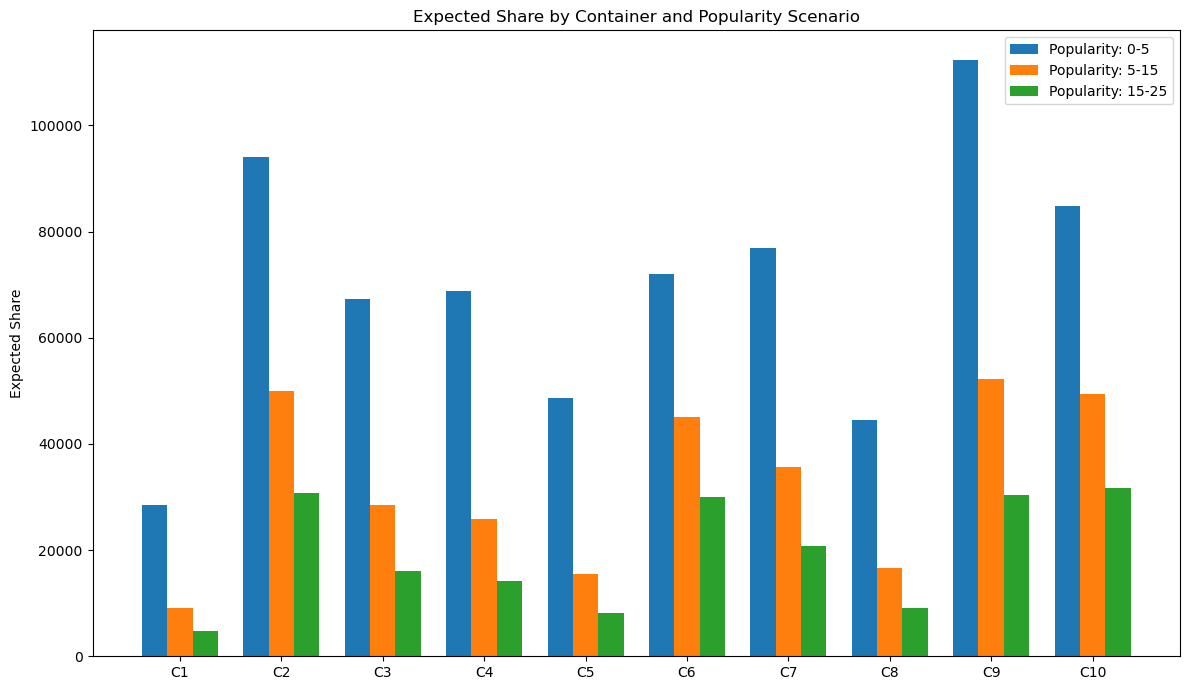

In [73]:
import numpy as np
containers = df['Container']
expected_low = df['ExpectedShare_Low']
expected_mid = df['ExpectedShare_Mid']
expected_high = df['ExpectedShare_High']

x = np.arange(len(containers))
width = 0.25  # width of each bar

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width, expected_low, width, label='Popularity: 0-5')
rects2 = ax.bar(x, expected_mid, width, label='Popularity: 5-15')
rects3 = ax.bar(x + width, expected_high, width, label='Popularity: 15-25')

# Add labels and title
ax.set_ylabel('Expected Share')
ax.set_title('Expected Share by Container and Popularity Scenario')
ax.set_xticks(x)
ax.set_xticklabels(containers)
ax.legend()

plt.tight_layout()
plt.show()

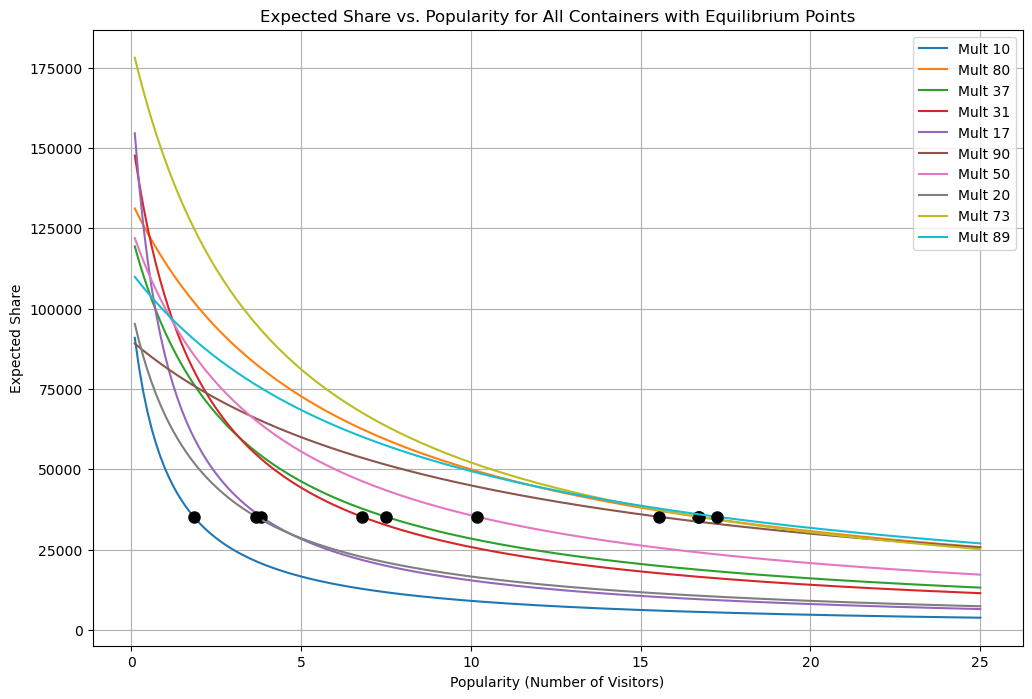

In [74]:
#35000 Equilibrium expected Share price

import matplotlib.pyplot as plt
import numpy as np

# Generate a continuous range of popularity values (avoiding zero)
pop_range = np.linspace(0.1, 25, 200)

plt.figure(figsize=(12, 8))

n = np.array(df['Treasure_Multiplier'])
d_arr = np.array(df['Inhabitants'])
k = np.sum(n) / (100 + np.sum(d_arr))



# Loop over each container and plot its Expected Share over the popularity range.
for idx, row in df.iterrows():
    T_treasure = row['Total_Treasure']
    inhabitants = row['Inhabitants']
    # Plot the continuous expected share curve.
    plt.plot(pop_range, T_treasure / (inhabitants + pop_range), label=f"Mult {row['Treasure_Multiplier']}")
    # Compute equilibrium popularity for this container.
    eq_pop = (row['Treasure_Multiplier'] / k) - inhabitants
    eq_share = T_treasure / (inhabitants + eq_pop)
    # Plot the equilibrium point on the curve.
    plt.plot(eq_pop, eq_share, 'ko', markersize=8)


plt.xlabel("Popularity (Number of Visitors)")
plt.ylabel("Expected Share")
plt.title("Expected Share vs. Popularity for All Containers with Equilibrium Points")
plt.legend()
plt.grid(True)
plt.show()

Treasure_Multiplier 10: popularity = 1.00
Treasure_Multiplier 80: popularity = 10.00
Treasure_Multiplier 37: popularity = 4.40
Treasure_Multiplier 31: popularity = 4.20
Treasure_Multiplier 17: popularity = 2.40
Treasure_Multiplier 90: popularity = 8.00
Treasure_Multiplier 50: popularity = 6.00
Treasure_Multiplier 20: popularity = 2.00
Treasure_Multiplier 73: popularity = 10.60
Treasure_Multiplier 89: popularity = 9.80


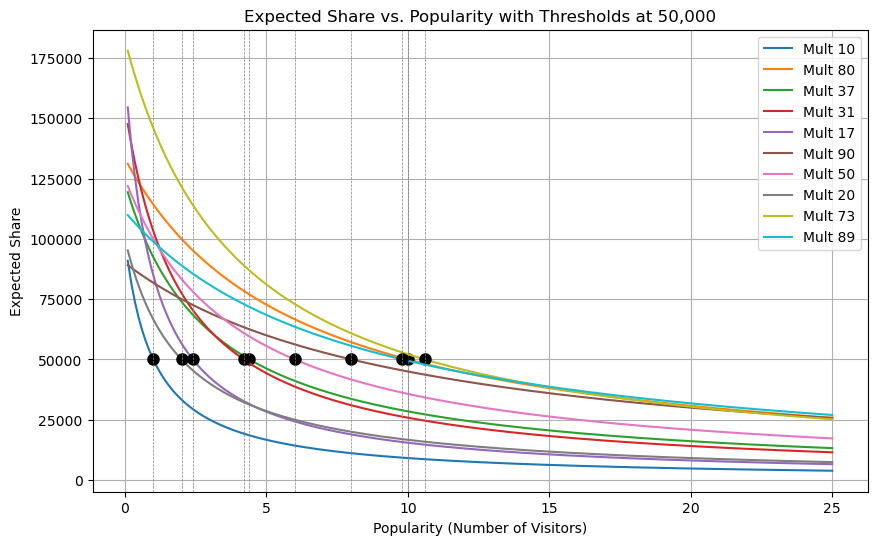

In [75]:
#50000 threshold

import matplotlib.pyplot as plt
import numpy as np

# Generate a continuous range of popularity values.
pop_range = np.linspace(0.1, 25, 200)  # Avoid zero to prevent division errors.
plt.figure(figsize=(10, 6))

time50k = []

# Loop over all containers in df.
for idx, row in df.iterrows():
    T_treasure = row['Total_Treasure']
    inhabitants = row['Inhabitants']
    # Plot the continuous expected share curve.
    plt.plot(pop_range, T_treasure / (inhabitants + pop_range), label=f"Mult {row['Treasure_Multiplier']}")
    
    # Compute popularity threshold for which Expected Share reaches 50,000.
    threshold_pop = (row['Treasure_Multiplier'] / 5) - inhabitants
    # Expected share at that point should be 50,000 if threshold_pop is positive.
    threshold_share = T_treasure / (inhabitants + threshold_pop) if threshold_pop > 0 else np.nan
    
    # Plot the threshold point and a dashed vertical line, if the threshold is within our range.
    if threshold_pop > 0 and threshold_pop <= max(pop_range):
        plt.plot(threshold_pop, threshold_share, 'ko', markersize=8)
        plt.axvline(x=threshold_pop, color='grey', linestyle='--', linewidth=0.5)
        print(f"Treasure_Multiplier {row['Treasure_Multiplier']}: popularity = {threshold_pop:.2f}")
        time50k.append([row['Treasure_Multiplier'], threshold_pop])



plt.xlabel("Popularity (Number of Visitors)")
plt.ylabel("Expected Share")
plt.title("Expected Share vs. Popularity with Thresholds at 50,000")
plt.legend()
plt.grid(True)
plt.show()




In [76]:
time50k

[[10, 1.0],
 [80, 10.0],
 [37, 4.4],
 [31, 4.2],
 [17, 2.4],
 [90, 8.0],
 [50, 6.0],
 [20, 2.0],
 [73, 10.6],
 [89, 9.8]]

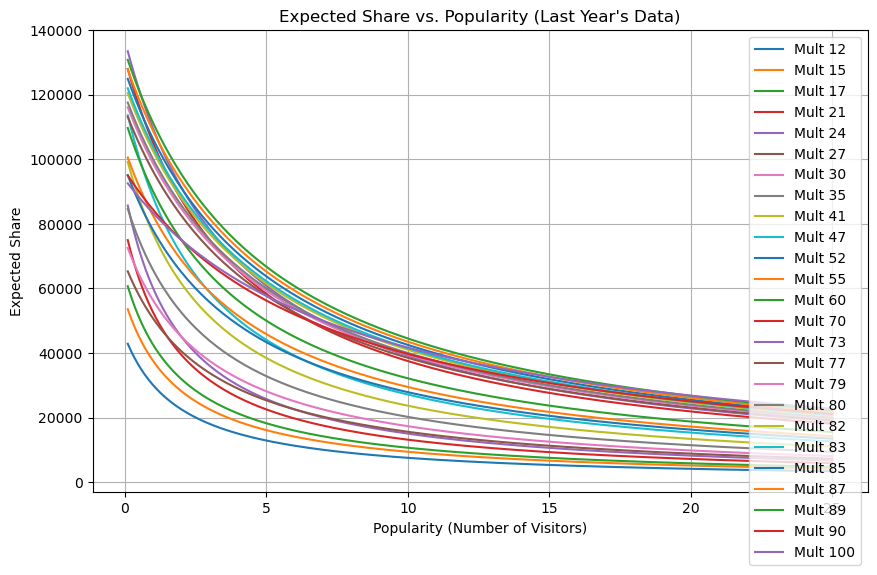

In [77]:
# Last year's multiplier-to-hunter dictionary.
crate_dict_prev = {
    24: 2, 70: 4, 41: 3, 21: 2, 60: 4, 47: 3, 82: 5, 87: 5, 80: 5, 
    35: 3, 73: 4, 89: 5, 100: 8, 90: 7, 17: 2, 77: 5, 83: 5, 
    85: 5, 79: 5, 55: 4, 12: 2, 27: 3, 52: 4, 15: 2, 30: 3
}

# Create a DataFrame from the dictionary with keys as Treasure_Multiplier and values as Inhabitants.
df_prev = pd.DataFrame(list(crate_dict_prev.items()), columns=["Treasure_Multiplier", "Inhabitants"])
df_prev.sort_values("Treasure_Multiplier", inplace=True)

# Define constants.
base_treasure = 7500

# Calculate Total Treasure for each container.
df_prev["Total_Treasure"] = base_treasure * df_prev["Treasure_Multiplier"]

# Generate a continuous range of popularity values.
pop_range = np.linspace(0.1, 25, 200)  # Avoid zero to prevent division errors.
plt.figure(figsize=(10, 6))

# Loop over each container in df_prev and plot its continuous Expected Share curve.
for idx, row in df_prev.iterrows():
    T_treasure = row["Total_Treasure"]
    inhabitants = row["Inhabitants"]
    plt.plot(pop_range, T_treasure / (inhabitants + pop_range), label=f"Mult {row['Treasure_Multiplier']}")

plt.xlabel("Popularity (Number of Visitors)")
plt.ylabel("Expected Share")
plt.title("Expected Share vs. Popularity (Last Year's Data)")
plt.legend()
plt.grid(True)
plt.show()


Find Mean Square Error (MSE) between this year's 10 containers, and last years 25 crates with hunters

In [114]:

# Define the continuous popularity range (avoid zero to prevent division errors)
pop_range = np.linspace(0.1, 25, 200)

# Initialize a matrix to store the MSE values.
mse_matrix = np.zeros((len(df), len(df_prev)))

# Loop over each container from this year (df)...
for i, row_this in df.iterrows():
    T_this = row_this['Total_Treasure']
    inh_this = row_this['Inhabitants']
    # Compute the expected share curve for this container over the pop_range
    curve_this = 2*T_this / (inh_this + pop_range)
    
    # Loop over each container from last year (df_prev)
    for j, row_prev in df_prev.iterrows():
        T_prev = row_prev['Total_Treasure']
        inh_prev = row_prev['Inhabitants']
        # Compute the expected share curve for last year's container over the same pop_range
        curve_prev = T_prev / (inh_prev + pop_range)
        # Compute the Mean Squared Error between the two curves:
        mse = np.mean((curve_this - curve_prev) ** 2)
        mse_matrix[i, j] = mse

# Optionally create a DataFrame for better readability.
# Using the container names from this year (if available) for the rows,
# and Treasure_Multiplier for last year's containers (converted to string) for the columns.
row_labels = df['Treasure_Multiplier']
col_labels = df_prev['Treasure_Multiplier'].astype(str)

df_mse = pd.DataFrame(mse_matrix, index=row_labels, columns=col_labels)

print("Mean Squared Error Matrix:")
print(df_mse)





Mean Squared Error Matrix:
Treasure_Multiplier            12            15            17            21  \
Treasure_Multiplier                                                           
10                   2.326816e+08  3.316428e+08  1.296524e+08  3.240388e+08   
80                   8.780659e+09  4.727322e+09  7.087058e+09  9.325071e+09   
37                   3.147029e+09  1.023831e+09  2.194163e+09  3.492318e+09   
31                   3.509981e+09  1.351203e+09  2.548184e+09  3.878135e+09   
17                   1.742625e+09  6.779169e+08  1.202267e+09  1.994305e+09   
90                   5.470748e+09  2.454163e+09  4.169265e+09  5.873405e+09   
50                   4.703414e+09  1.922681e+09  3.497930e+09  5.116436e+09   
20                   8.774954e+08  1.097289e+08  4.421100e+08  1.066161e+09   
73                   1.231987e+10  7.449777e+09  1.031987e+10  1.298621e+10   
89                   7.508265e+09  3.824534e+09  5.953435e+09  7.995821e+09   

Treasure_Multiplier     

In [ ]:
# Create a new dictionary where for each container in top15_dict,
'''
top15_dict = {}
for container in df_mse.index:
    # Sort the row by MSE in ascending order and select the top 5.
    top15 = df_mse.loc[container].sort_values().head(15)
    top15_dict[container] = top15

print(top15_dict)

new_top15_dict = {}

'''

In [137]:
# --- Given mult_freq dictionary ---
mult_freq = {
    100:4.930095673, 90:3.433897257, 89:10.76, 87:9.835663795, 85:6.548933029, 
    83:5.445180416, 82:6.2, 80:4.145204544, 79:5.445180416, 77:4.562178135, 
    73:11.30733395, 70:8.167770386, 60:3.654648066, 55:2.649006605, 52:1.93766, 
    47:3.016924381, 41:1.888643622, 35:1.152808428, 30:0.0, 27:0.0, 24:1.520725965, 
    21:0.0, 17:0.6131959558, 15:0.0, 12:0.0
}

top5_df = df_mse.apply(
    lambda row: pd.Series(
        list(map(int, row.sort_values().head(5).index)),
        index=["Top1", "Top2", "Top3", "Top4", "Top5"]
    ),
    axis=1
)

print("Top 5 Multiplier Numbers for Each Container (lowest MSE):")
print(top5_df)

top5_freq_df = top5_df.applymap(lambda x: mult_freq.get(x, x))

#Sum across the 5 columns (for each container) to compute the projected frequency.
projected_freq_series = top5_freq_df.sum(axis=1)/2
projected_freq_df = projected_freq_series.to_frame(name="Projected_Frequency")

print("\nProjected Frequencies for Each Container (this year):")
print(projected_freq_df)


Top 5 Multiplier Numbers for Each Container (lowest MSE):
                     Top1  Top2  Top3  Top4  Top5
Treasure_Multiplier                              
10                     27    17    89    83    47
80                     55    35    80    79    52
37                     55    35    80    52    79
31                     55    35    52    80    79
17                     52    15    55    35    80
90                     55    35    80    79    30
50                     55    35    80    52    79
20                     52    15    35    80    55
73                     55    35    80    52    79
89                     55    35    80    79    30

Projected Frequencies for Each Container (this year):
                     Projected_Frequency
Treasure_Multiplier                     
10                               9.91765
80                               7.66493
37                               7.66493
31                               7.66493
17                               4.94234
